    
---

# North's energy balance model


<div class="alert alert-info"> 
    

### Introduction


This week, we will work with the energy balance by North (1975). 
    
The model is similar to the model by Budyko (1969), except for the form of the meriodional heat transport term. Here, the meriodional transport is characterized by a thermal diffusion. The diffusion coefficient does not depend on the climate itself. By adjusting this parameter, the model can succesfully fit the present climate. 

Another difference is that the variable used to describe the latitudinal dependence is $x=sin(\varphi)$. This is the natural variable, because it weights the area of each latitude band. 
    
The exercise consists of three parts: 
    
**Part 1**: We will investigate a mean annual version of the model. As in Budyko's model, we need to iterate to obtain the correct meridional heat transport. Here, the iteration is formulated as a time evolution. 

**Part 2**: We will investigate the seasonal insolation variation.

**Part 3**: We will develop the North model to include seasonal variations, by combining the part 1+2 scripts. 

In each part, we will investigate how the model parameters affect the simulated temperatures, and use the model to study some scenarios. The focus is on understanding each parameter, and to investigate climate feedbacks and sensitivity. In parts 1 and 2, the code will be provided, and we will perform experiments with various modified parameters.   

</div>

---

# PART 1. Mean annual, one-dimensional energy balance model with a diffusive horizontal heat transport:

### Derive the model equations:

---

We assume that the Earth is a perfect sphere with a radius $R$, and we consider a latitude dependent energy balance model.

**Latitude bands**:

We divide the surface of the Earth into a set of latitude bands, and consider the energy balance of each latitutde band. For a latitude band at latitude $\varphi$ with a width $d\varphi$, we  can write: 

The radius is: $r(\varphi)=R cos(\varphi)$

The circumference is: $Cir(\varphi)=2 \pi R cos(\varphi)$

The width (in meters) is: $Width(\varphi)=Rd\varphi$

The surface area is: $Area(\varphi)=Cir(\varphi) \cdot Width(\varphi)=2 \pi R cos(\varphi) \cdot R d\varphi = 2 \pi R^2 cos(\varphi) d\varphi$

---

**Heat diffusion**:

We assume that the meriodional (over latitudes) heat transport is described as a thermal diffusion, and expressed as $H(\varphi)=-\mathcal{D} \cdot \frac{\partial T}{R \partial \varphi}$. The latitudinal heat flux $H$ is proportional to the temperature gradient over latitudes, but with opposite sign (heat transport is from warm to cold), and is written in polar coordinates on the surface of a sphere with radius $R$ and latitude $\varphi$. The unit of the heat flux is $[W/m^2]$.

---

**The energy balance of a latitude band**:

We will now calculate the total contributions to the energy balance of the latitude band in units of $[W]$: 

Incoming short-wave solar radiation: $Q(\varphi) \cdot (1-\alpha(\varphi))\cdot Area(\varphi)$

Outoing longwave: $(A + B\cdot T(\varphi)) \cdot Area(\varphi)$

Incoming heat diffusion (at $\varphi$): $ H(\varphi)=-\mathcal{D}\cdot \frac{\partial T}{R \partial\varphi} \cdot Cir(\varphi) $

Outgoing heat diffusion (at $\varphi +d\varphi$): $ H(\varphi)+\frac{\partial H(\varphi)}{\partial \varphi} \cdot d\varphi=-\mathcal{D} \cdot \frac{\partial T}{R \partial\varphi} \cdot Cir(\varphi) + \frac{\partial }{ \partial\varphi} (-\mathcal{D}\cdot \frac{\partial T}{R \partial\varphi} \cdot Cir(\varphi) )\cdot d\varphi$

The energy balance is the sum of ingoing and outgoing terms. We divide with the area  $Area(\varphi)=2 \pi R^2 cos(\varphi) d\varphi$ and find: 

$Q(\varphi) \cdot (1-\alpha(\varphi)) = A + B\cdot T(\varphi) - \frac{1}{cos(\varphi)} \frac{\partial }{ \partial\varphi} (D \cdot cos(\varphi) \cdot \frac{\partial T}{\partial\varphi})$

where $D=\mathcal{D}/R^2$ is the diffusion constant in units of $W/(m^2K)$.

---

**Using the x coordinate instead of $\varphi\$**:

For simplicity, the equation is often expressed in terms of the variable $x=sin(\varphi)$. In order to change the coordinate, we use the following: 

$cos^2(\varphi) + sin^2(\varphi) =1 \quad \longleftrightarrow \quad cos^2(\varphi)=1-x^2$

$ \frac{dx}{d\varphi}=cos(\varphi) \quad \longrightarrow \quad 
\frac{\partial T}{\partial x}=\frac{\partial T}{\partial \varphi}\ \frac{\partial \varphi}{\partial x} =\frac{\partial T}{\partial \varphi}\ \frac{1}{cos(\varphi)} $, i.e. $\frac{\partial}{\partial x} =  \frac{1}{cos(\varphi)} \ \frac{\partial }{\partial \varphi} $

We can then write the heat balance equation in terms of $x$ as:

$ Q(x) \cdot (1-\alpha(x))  = A+B\cdot T(x)  - \frac{\partial }{ \partial x} \left[ D\cdot (1-x^2) \cdot \frac{\partial T(x)}{ \partial x}\right]$

Notice, that with a uniform step size $\Delta x$, each latitude band will cover the same area ($dx/d\varphi=cos(\varphi)$). 

---

**A time-dependent energy balance equation**: 

The temperatures $T(x)$ can be determined by an iterative approach: Assume an initial temperature distribution, calculate the albedo, calculate the meridional heat transport, solve for the temperature, and iterate until the solution has converged. 

However, we can also formulate a time-dependent energy balance equation, where we assume an initial temperature, and let the model evolve until it is in steady state, by iterating through time-steps until the solution has converged. This approach can also be used if the climate varies (e.g. seasonal cycles, see part 3).

Consider again a latitude band. If the incoming and outgoing heat fluxes do not balance, there is a net heat flux $H_{net}$ entering or leaving the latitude band. This will either heat up or cool down the latitude band, and this can be expressed in terms of a change in temperature per time: 

$H_{net}=H_{in}-H_{out}=C \frac{\partial T}{\partial t}$

where the unit of $H_{net}$ is $W/m^2$, and $C$ is the heat capacity of the system in units of $[W/(m^2 \cdot K/yr)]$

In the part 1 of this exercise, we keep the insolation as a constant in time $Q=Q(x)$, and let the temperature $T=T(x,t)$ and the albedo $\alpha=\alpha(x,t)$ evolve over time into a steady state, converged solution. In part 3, we will let the insolation depend on latitude and day of the year.


<div class="alert alert-info">
    
We can now write the time-dependent energy balance equation as: 

$$ \boxed{ C \frac{\partial T}{\partial t} = Q(x,t) \cdot (1-\alpha(x,t)) - (A + B\ T(x,t)) + \frac{\partial }{ \partial x} \left[ D\cdot (1-x^2) \cdot \frac{\partial T(x,t)}{ \partial x} \right] } $$

---

We use the following set of standard parameters: 
    
$S_0  =\ 1354.0 \ W/m^2$
    
$L =\ 1$ is the luminosity relative to present, $L=S/S_0$

$A=\ 203.0\ W/m^2$

$B=\ 2.09\ W/m^2/\ ºC$
    
$D=\ 0.44\ W/m^2/\ ºC$
    
$C=C_{w}=\ 9.8 W/m^2/(K/yr)$


The albedo is temperature dependent, to include the ice-albedo feedback (as in the Budyko exercise):
    
$ \alpha(T)=
    \begin{cases}
        0.3 + 0.08(3x^2-1);\ \ ice \ free: T \geq -10ºC \\
        0.6;\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ice \ covered: T < -10ºC \end{cases}$

The annual mean insolation as a function of latitude is estimated from this approximation (as in the Budyko exercise):

$ Q(x)= L \cdot S_0 /4 \cdot f(x)=L \cdot S_0 /4 \cdot [ 1 - 0.241 (3 x^2 - 1)]$

In part 2 and 3 of the exercise, we will use an insolation that varies seasonally, i.e. $Q=Q(x,t)$, where $t$ is time.

</div>

### Numerical implementation in Python

---

The model is implemented in Python in the code cells below. The code is complete, and the first part of the exercise focus on discussing the calculatd temperatures and investigate how the solution changes when the model parameters are varied. The tasks appear below the code. 

The model has some optional settings: 

- The model will start with an initial temperature of $+20ºC$ (default). An optional setting is to set "cold-start" to 1, which starts with a cold offset of $-40ºC$.

- The model will start with a uniform diffusion constant $D$ (default). An optional setting is to set "hadleyflag" to 1, which includes a Hadley cell as described in the tasks below.

- The model will assume that the albedo change at a critical temperature $T_c=-10ºC$ as described above (default). The albedo is iteratively updated as described above. An optional setting is to set "albedoflag" to 0, which assumes a fixed snowline at $72º$.

To answer the tasks below, you will have to run the model multiple times with different parameters and compare the solutions. You can do this by copying the cells in and modify for each question, or you can revise the code, so the temperature is calculated by a function, and you can then run the model by calling a function with different parameters.

<div class="alert alert-success">

**TASK 1.1** 
Run the model with the default settings and standard parameters. Study the plots and explain what they show. 

Calculate the global mean temperature and print it as a title above the first figure with the temperature solution. [Hint: because we use $T=T(x)$, the mean temperature is easily calculated as the mean of each coefficent in $T$. The print command is commented out].
    
The global mean temperature is slightly different from $+15º$. Below we will see the influence of the model parameters. 

</div>

<div class="alert alert-danger">

*Solution task 1.1* 
The figure shows: top: temperature solution, middle: poleward, meridional heat flux, positive for northward, negative for southward, bottom: net incoming SW (orange), net outgoing LW (green), difference (blue).
    
The meridional heat flux ($F$ in the middle figure) is closely related to the temperature ($T$ in the top figure): the heat flux is a heat diffusion process and thus depends on the temperature gradient over latitudes, i.e. $H(\varphi)=-\mathcal{D}\cdot \frac{\partial T}{R \partial\varphi}$, so it depends on the slope of the temperature function. 
    
The mean annual temperature is $+14.39º$. It can be calculated as the mean of the temperature at each x-latitude band, because we use the x-coordinate. 

</div>

In [78]:
# Load libraries
import numpy as np
import math
import matplotlib.pyplot as plt

pi=np.pi
deg2rad=pi/180
rad2deg=1/deg2rad

In [79]:
# Define the latitude dependent insolation
def Q_lat(xs,L=1,S0=1354.0):    

    return  L*(S0/4)*(1 - 0.241*( 3*np.square(xs) - 1 ))
 

In [80]:
# Define the albedo function
def albedo(T,jmx, albedoflag):
    alb=np.ones(jmx)*0.3
    if (albedoflag == 1):
        k=np.argwhere(T<=-10)
        alb[k]=0.6# recalculate albedo for snowline at T=-10C
    else:
        k=np.argwhere(abs(x)>=0.95)
        alb[k]=0.6# recalculate albedo for fixed snowline
        
    return alb


In [81]:
# Define the heat diffusion function

def D_lat(xs,D0=0.44,hadleyflag=False):
    if hadleyflag ==1:
        return D0 *( 1 + 9*np.exp(-(xs/np.sin(30*np.pi/180))**6)) #latitude dependent diffusion with hadley cell
    else:
        return D0*np.ones(len(xs)) # constant diffusion without hadley cell
      

In [82]:
# Define functions used for matrix operations when solving the equations

# Define the intermediate function to calculate matrix coefficients
def setupfastMh(delx,jmx,D,B,Cl,delt):
    #set up lambda array.
    lam=(1-np.arange(-1,1,delx)*np.arange(-1,1,delx))/(delx*delx)
    lam=D[0:jmx]*lam
    M=np.zeros((jmx,jmx))
    # do something special at the boundaries
    M[0,0]=-B-lam[1] #first points
    M[0,1]=lam[1]
    M[jmx-1,jmx-2]=lam[jmx-1] # last points
    M[jmx-1,jmx-1]=-B-lam[jmx-1]
    for jj in range(jmx-2):
        j=jj+2
        M[j-1,j-2] = lam[j-1]
        M[j-1,j-1]   = -B - (lam[j]+lam[j-1])
        M[j-1,j] = lam[j]
    # add in heat capacities
    M=M/Cl
    # calculate the inverse of M', the matrix operator.
    Mh=M
    return Mh

def setupfastinvM(Mh,jmx,delt):
    M=0.5*Mh
    for j in range(jmx):
        M[j,j]=M[j,j]-1/delt
    invM = np.linalg.inv(M) 
    return invM


In [83]:
# This is the main script in the steady state version of the North model

# Set physical parameters
S0=1354.0 #The solar constant, corresponds to Q_0=338.5 W/m2
L=1 #the relative strength of the solar constant, 1=present
A=203.3
B=2.09
Dmag=0.44
Cl=9.8 #unit W/m2*yr/K
Toffset=0 
coldstart=0 #1, then Toffset is set to -40 for a cold initial temperature
hadleyflag=0 #0: no hadley cell
albedoflag=1 #1: albedo feedback with T_crit, otherwise a fixed boundary at 72deg

# Define a function that initializes the model and calculates T
# Set model parameters
jmx=251
delt=1/50
NMAX=100000
delx=2/jmx

# define an array with latitude steps in both x and phi
x= np.linspace(-1,1,jmx)
phi=np.arcsin(x)*rad2deg

# Calculate an array of annual mean insolation for the latitudes steps
S=Q_lat(x,L,S0)  
    
# Calculate an array of diffussion constants
xmp=np.arange(-1,1+delx,delx)
D=D_lat(xmp,Dmag,hadleyflag)

# define initial T array
T = 0*(1-2*np.square(x))
if coldstart == 1:
    Toffset = -40
T=T+Toffset
Tinit=T

# Calculate global mean temperature
Tglob=np.mean(T) #ok to take the mean when we use x

# Calculate initial albedo
alb=albedo(T,jmx,albedoflag)

# Initial boundary conditions
src=(1-alb)*S/Cl-A/Cl
Mh=setupfastMh(delx,jmx,D,B,Cl,delt)
invM=setupfastinvM(Mh,jmx,delt)
h=np.dot(Mh,T)+src

# Start time-stepping loop
for n in range(NMAX):
    Tglob_prev=Tglob
    # calculate src for this loop
    alb=albedo(T,jmx,albedoflag)
    src=(1-alb)*S/Cl-A/Cl
    # Calculate new T.
    T=-np.dot(invM,0.5*(h+src)+T/delt)
    
    # Calculate h for next loop.
    h=np.dot(Mh,T)+src
    # Check to see if global mean temperature has converged
    Tglob=np.mean(T)
    #print(Tglob)
    Tchange = Tglob-Tglob_prev
    if abs(Tchange)< 1e-12:
        break

# Compute meridional heat flux and its convergence
a=6.37e+6; # earth radius in meters
Mh=setupfastMh(delx,jmx,D,0,1,delt)
invM=setupfastinvM(Mh,jmx,delt)
Dmp=D[0:jmx]
divF=np.dot(Mh,T)
F=-2*math.pi*a*a*np.sqrt(1-x*x)*Dmp*np.gradient(T,delx)


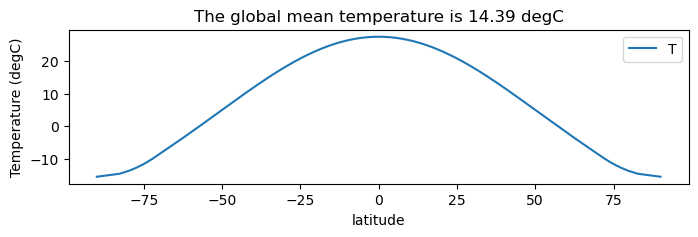

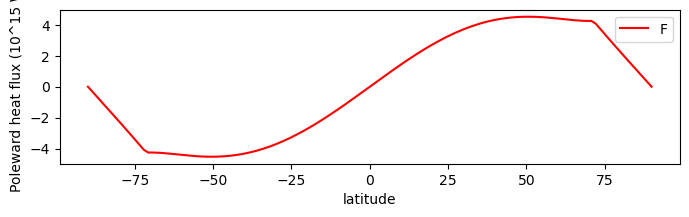

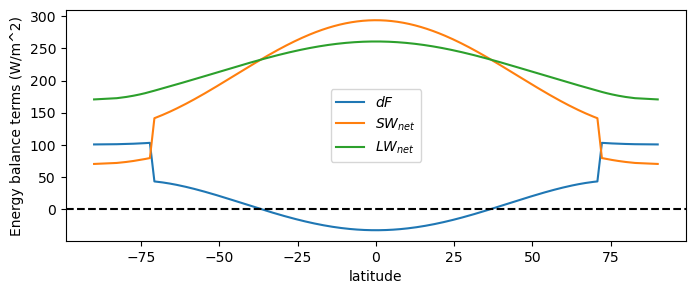

In [84]:
# Plotting in the steady state North model:
# plot the temperature and energy fluxes in equilibrium 

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='T')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.title(f'The global mean temperature is {Tglob:.2f} degC')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,'r',label='F')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,3))
plt.plot(phi,divF,label='$ dF$')
plt.plot(phi,(1-alb)*S,label='$SW_{net}$')
plt.plot(phi,A+B*T,label='$LW_{net}$')
plt.axhline(y=0,linestyle='--',color='k')
plt.xlabel('latitude')
plt.ylabel('Energy balance terms (W/m^2)')
plt.legend()
plt.show()


In [85]:
T_mean=np.mean(T)
print('Tmean=',T_mean,'ºC')
    

Tmean= 14.38563294612646 ºC


<div class="alert alert-success">

**TASK 1.2 - vary D**:

About D: The meridional heat transport, expressed here by the diffusion coefficient D depends on processes in the atmosphere and ocean. The energy is transported as sensible heat, latent heat or potential and kinetic energy. In the tropics, most of the atmospheric transport is dominated by the
Hadley circulation, in the mid‐latitudes nearly all transport is affected by the mixing related to weather systems. In the ocean, both the wind‐driven and deep‐ocean circulation contribute to the poleward heat transport. The role of the ocean eddies is less well known.

---

**Task 1.2.1** Run the model with the standard parameter set. Note the maximum poleward heat flux, the mean global temperature $T_{mean}$, and the pole‐to‐equator temperature difference $\Delta T_{EP}$. What happens when there is no meridional transport $D=0$? Estimate $T_{mean}$ and $\Delta T_{EP}$, and briefly describe the changes to the climate.
    
[Hint: Plot the two solutions in the same figure for easier comparison. You can make revised versions of the cell in all the exercises below]

**TASK 1.2.2**: Try values of $D=0.24\ W\ m^{-2}\ ºC^{-1}$ and $D=0.64\ W\  m^{-2}\ ºC^{-1}$. Are the changes to the
climate consistent with your expectations? For example, note changes in $T_{mean}$
and $\Delta T_{EP}$.
Compare the maximum poleward heat flux in these integrations with that using $D=0.44\ W\  m^{-2}\ ºC^{-1}$. Explain why the changes to the heat flux are not simply proportional to
the changes in $D$.
    
**TASK 1.2.3**: Fossil remains of crocodiles dating back to the Eocene (53‐57 mill. Years ago= have been
found on Ellesmere Island (north Canada, latitude now 80°N). Assuming that crocodiles can
survive when the mean annual temperature is 10°C and that Ellesmere has not shifted its
latitude position much (which is probable), find the rough value of 𝐷 necessary for the crocodiles to have survived. What is the poleward heat flux required for this? Speculate how
could 𝐷 have changed this way.
    
    
</div>

<div class="alert alert-danger">

I have copied the cells with the main script in below, and split it up into 1) a cell where all model parameters are defined, 2) a cell where the model function is defined. Then I added a cell where I call the model again and again with different values of D. The function returns all relevant parameters, and notice that some parameters are given a special name to identify it and so it is not written over by the next call of the model function. Finally I plot the results together below.
    
*Solution task 1.2.1*: 
    
For standard $D$, we find: $T_{mean}=14.39°C$, $\Delta T_{EP}=43°C$, $F_{max}=4.52 \cdot 10^{15} W$, and $T_{max}=27.6°C$.
    
With $D=0$, we find: $T_{mean}=9.61°C$, $\Delta T_{EP}=107°C$, $F_{max}=0 W$, and $T_{max}=43.4°C$.
    
With meridional no transport, the surface temperatures depends only on the local energy balance, i.e. higher temperatures at the low latitudes, lower at the high latitudes. Also, ice forms at high latitudes, resulting in a step change towards colder temperatures, and a lower mean temperature.
    
*Solution task 1.2.2*: 
    
For the low $D$, we find:  $T_{mean}=9.00°C$, $\Delta T_{EP}=68°C$, $F_{max}=5.44 \cdot 10^{15} W$, and $T_{max}=30.7°C$. 
    
For the high $D$, we find:  $T_{mean}=15.88°C$, $\Delta T_{EP}=29°C$, $F_{max}=4.73 \cdot 10^{15} W$, and $T_{max}=25.6°C$.
    
The equator temperature changes by $\pm 2\ ℃$, depending on the magnitude of the heat transport (which removes heat away from the equator). The ice front moves north with higher heat transport: at appr. 47º for the low $D$ case, at appr. 62º for the default case, and no ice for the high $D$ case. 

The position of the ice front affects directly $T_{mean}$ (low, medium, high),
and  $\Delta T_{EP}$ (high, medium, low). The poleward heat flux is related to the temperature gradient (the slope of the temperature), and this is not related to $D$ in a simple way. The poleward heat flux must be zero at the poles and at the equator, and it is in general maximum at the mid‐latitudes, where the temperature gradient is steepest (and sometimes, the maximum is at the ice front.
    
*Solution task 1.2.3*: With all other parameters at the default value, using $D=2.72\ W\  m^{-2}\ ºC^{-1}$ gives a mean annual temperature of approximately 10°C at 80°N. If a broad Hadley cell circulation is included,
less diffusion is needed. Higher diffusion can be related to more precipitation in a warmer climate, stronger Hadley cell, different atmospheric circulation.


In [86]:
# First, set all parameters: physical parameters, model parameters, model flag options

# Set physical parameters
S0=1354.0 #The solar constant, corresponds to Q_0=338.5 W/m2
L=1 #the relative strength of the solar constant, 1=present
A=203.3
B=2.09
Dmag=0.44
Cl=9.8 #unit W/m2*yr/K
Toffset=0 
coldstart=0 #1, then Toffset is set to -40 for a cold initial temperature
hadleyflag=0 #0: no hadley cell
albedoflag=1 #1: albedo feedback with T_crit, otherwise a fixed boundary at 72deg

# Set model parameters
jmx=251
delt=1/50
NMAX=100000
delx=2/jmx

# define an array with latitude steps in both x and phi
x= np.linspace(-1,1,jmx)
phi=np.arcsin(x)*rad2deg



In [87]:
# This is the second half of the main script above, now changed to be a function: 
# This function calculates all the unknowns, i.e. T, Tglob, F, divF, alb, S

#define north model function
#add parameters to be changed in model inputs (note Toffset=0 must be added inside function) 
def north_model(A=203.3, B=2.09, Dmag=0.44, L=1, coldstart=0, hadleyflag=0, albedoflag=1):

    # Calculate an array of annual mean insolation for the latitudes steps
    S=Q_lat(x,L,S0)  

    xmp=np.arange(-1,1+delx,delx)
    
    # Calculate an array of diffussion constants
    D=D_lat(x,Dmag,hadleyflag)

    # define initial T array
    T = 20*(1-2*np.square(x))
    Toffset=0 #add Toffset inside function
    if coldstart == 1:
        Toffset = -40
    T=T+Toffset
    Tinit=T

    # Calculate global mean temperature
    Tglob=np.mean(T) #ok to take the mean when we use x

    # Calculate initial albedo
    alb=albedo(T,jmx,albedoflag)

    # Initial boundary conditions
    src=(1-alb)*S/Cl-A/Cl
    Mh=setupfastMh(delx,jmx,D,B,Cl,delt)
    invM=setupfastinvM(Mh,jmx,delt)
    h=np.dot(Mh,T)+src

    # Start time-stepping loop
    for n in range(NMAX):
        Tglob_prev=Tglob
        # calculate src for this loop
        alb=albedo(T,jmx,albedoflag)
        src=(1-alb)*S/Cl-A/Cl
        # Calculate new T.
        T=-np.dot(invM,0.5*(h+src)+T/delt)

        # Calculate h for next loop.
        h=np.dot(Mh,T)+src
        # Check to see if global mean temperature has converged
        Tglob=np.mean(T)
        #print(Tglob)
        Tchange = Tglob-Tglob_prev
        if abs(Tchange)< 1e-12:
            break

    # Compute meridional heat flux and its convergence
    a=6.37e+6; # earth radius in meters
    Mh=setupfastMh(delx,jmx,D,0,1,delt)
    invM=setupfastinvM(Mh,jmx,delt)
    Dmp=D[0:jmx]
    divF=np.dot(Mh,T)
    F=-2*math.pi*a*a*np.sqrt(1-x*x)*Dmp*np.gradient(T,delx)

    return T, Tglob, F, divF, alb, S

In [88]:
#call the function with standard set of parameters, i.e. D=0.44
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with D=0 
T0, Tglob0, F0, divF, alb, S = north_model(A, B, 0, L, coldstart, hadleyflag, albedoflag)

#call the function with low D: D=0.24 
Tlow, Tgloblow, Flow, divF, alb, S = north_model(A, B, 0.24, L, coldstart, hadleyflag, albedoflag)

#call the function with high D: D=0.64 
Thigh, Tglobhigh, Fhigh, divF, alb, S = north_model(A, B, 0.64, L, coldstart, hadleyflag, albedoflag)

#call the function with very high D: D=2.72 
Tvhigh, Tglobvhigh, Fvhigh, divF, alb, S = north_model(A, B, 2.72, L, coldstart, hadleyflag, albedoflag)

index80=math.floor(jmx/2+np.sin(80*np.pi/180)/2*jmx)-1
print(phi[index80])
print(Tvhigh[index80])

79.73690410137745
9.998416285889089


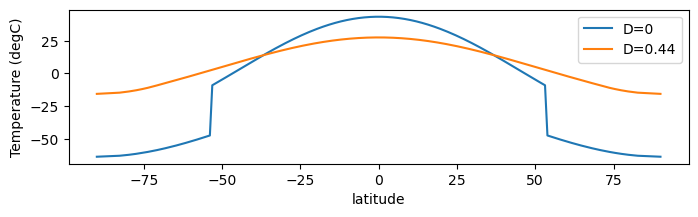

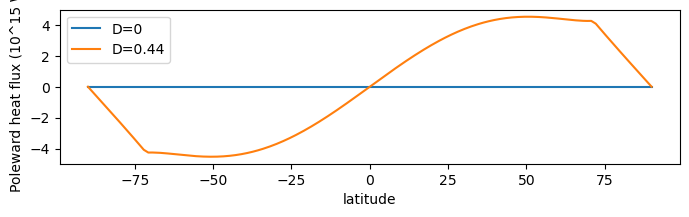

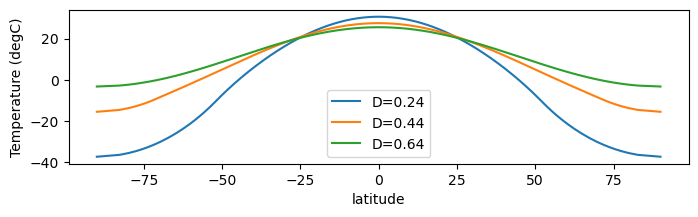

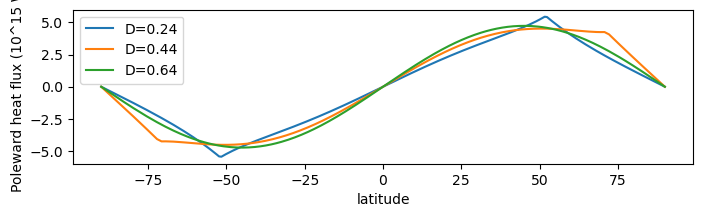

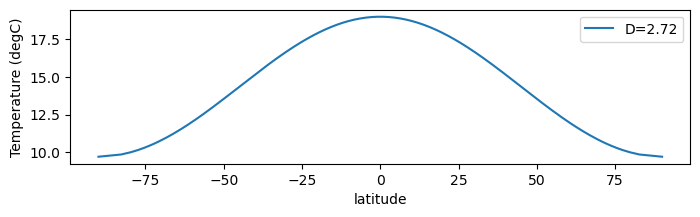

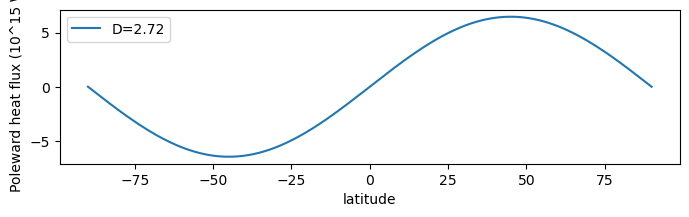

In [89]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T0,label='D=0')
plt.plot(phi,T,label='D=0.44')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F0*1e-15,label='D=0')
plt.plot(phi,F*1e-15,label='D=0.44')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()


fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Tlow,label='D=0.24')
plt.plot(phi,T,label='D=0.44')
plt.plot(phi,Thigh,label='D=0.64')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Flow*1e-15,label='D=0.24')
plt.plot(phi,F*1e-15,label='D=0.44')
plt.plot(phi,Fhigh*1e-15,label='D=0.64')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Tvhigh,label='D=2.72')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Fvhigh*1e-15,label='D=2.72')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

<div class="alert alert-success">

**TASK 1.3 - vary the luminosity of the sun**:
    
About L: The Sun’s luminosity is not constant in time. It is thought to have been gradually increasing through its lifetime. Models of solar evolution suggest that the Sun’s intensity $Q$ has increased roughly 10‐30% over the last $10^9$ years. Assume that this trend is linear and will continue. Start with the standard initial temperature for each part of this exercise and assume that the increase is 10% per
$10^9$ years. [Hint: you can change the value of $L$ manually and call the function again]

---

**Task 1.3.1**: Find the increase in the value of $Q$ (to within $1 \ W\ m^{-2}$ ) (or vary $L$) required to eliminate ice from the surface of the Earth (assume that ice forms when temperatures are below -10°𝐶). How long
would it take before there is no ice left? 

    
**Task 1.3.2**: Find the decrease in $Q$ (to within $1 \ W\ m^{-2}$ ) (or vary $L$) required to cause complete glaciation, and hence show that the model would predict a snowball Earth prior to about $10^9$ years ago.
While there is evidence for extensive (maybe global) glaciations about 500 mill. years ago, these periods appear to have been interrupted by times that were relatively warm. Speculate what assumptions made in the climate model might not have been applicable to Earth’s
climate billions of years ago. (Note that a snowball Earth would have a weaker equator to pole temperature difference, this would lead to a weaker Hadley circulation and heat transport)

</div>

<div class="alert alert-danger">

*Solution task 1.3.1*: 
    
To remove ice from the surface of the Earth, the minimum temperature must be $>-10°C$. We use trial-and-error and find that an increase by $3-3.5 ‰$ is enough to remove ice from the poles. Assuming that the solar constant changes linearly over time, we can calculate the time required for this change to happen: $\Delta t=10^9/0.1*0.0032=32Myr$.
    
*Solution task 1.3.2*: A decrease by 10% is enough to cause a total freeze down, where the maximum temperature is $>-10°C$.
    
The continents were placed differently 500 mill. years ago, and this would affect the meridional heat transport, represented in the model by $D$.

</div>

In [90]:
#call the function with standard set of parameters, i.e. L=1,1.0032,0.90
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with high L: L=1.0032 
Thigh, Tglobhigh, Fhigh, divF, alb, S = north_model(A, B, Dmag, 1.0031, coldstart, hadleyflag, albedoflag)

#call the function with low L: L=0.9 
Tlow, Tgloblow, Flow, divF, alb, S = north_model(A, B, Dmag, 0.90, coldstart, hadleyflag, albedoflag)

print(Tglob,np.max(T)-np.min(T),np.max(T), np.min(T))
print(Tglobhigh,np.max(Thigh)-np.min(Thigh),np.max(Thigh), np.min(Thigh))
print(Tgloblow,np.max(Tlow)-np.min(Tlow),np.max(Tlow), np.min(Tlow))

14.385632946126913 43.18554364769114 27.576138713859486 -15.609404933831655
15.401289291379513 41.09901000278249 28.183467250162114 -12.915542752620382
-39.07892156914222 18.626803382663354 -32.8203156325674 -51.447119015230754


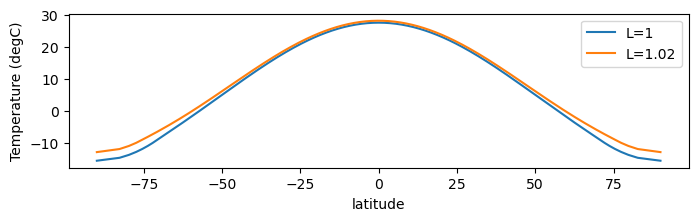

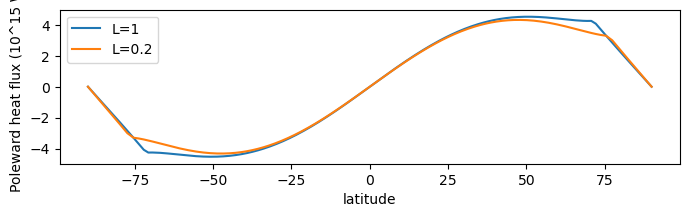

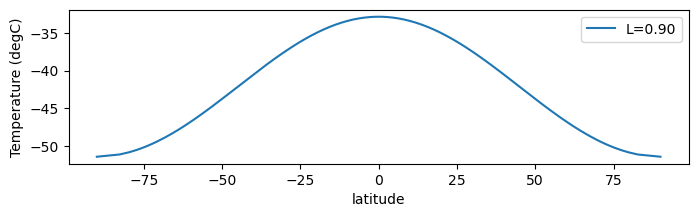

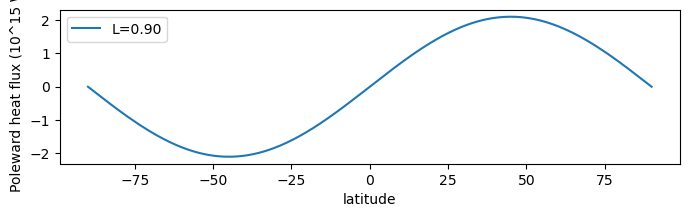

In [91]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='L=1')
plt.plot(phi,Thigh,label='L=1.02')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='L=1')
plt.plot(phi,Fhigh*1e-15,label='L=0.2')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Tlow,label='L=0.90')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,Flow*1e-15,label='L=0.90')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

<div class="alert alert-success">

**TASK 1.4 - vary A and B**:

About 𝑨 and 𝑩: The outgoing long‐wave radiation $OLR=A+B\cdot T$ is a result of numerous effects
affecting the long wave radiation. The amount of greenhouse gases, like $CO_2$ or $CH_4$, dominates
the outgoing radiation from the stratosphere. The radiation affects all latitudes independent of the
surface temperature $T$, and it is mainly expressed in value of $A$. Thus the model can take an increase
in $CO_2$ into account by decreasing the value of $A$ (see task 1.7). The presence of water vapor in
the troposphere also affects the outgoing radiation. Clouds and water vapor absorb part of the
outgoing radiation from the surface, and they emit radiation at a generally colder temperature from
higher in the atmosphere (upper part of the troposphere). The presence of clouds and water vapor
is dependent on the surface temperature $T$ (from wet areas), and can be expressed in the value of
$B$. The model can take a change in water vapor feedbacks into account by changing $B$, i.e. by changing
the sensitivity of the model to surface temperature.    
    
---

**1.4.1**: Alternative sets of longwave parameters have sometimes been used. For example apply
values of $A=211.2\ W\  m^{-2}$ and $B=1.55\ W\  m^{-2}\ ºC^{-1}$ in the model (holding everything else at the
standard values). Try change first $A$ alone, then $B$ alone, and finally both.
    
**1.4.2**: Describe briefly how the resulting climate is different from that using the
standard values. Explain how the values could change and what part of the climate they are
representing.
    
**1.4.3**: For this alternative choice of 𝐴 and 𝐵, and using $D=0.52\ W\  m^{-2}\ ºC^{-1}$ (in order to get back a climate more closely resembling the present), find the decrease in $𝑄$ (to within $1\ 𝑊\ m^{-2}$) required
for complete glaciation. Explain why a smaller decrease in $𝑄$ is now required to produce a
snowball Earth.    
 
</div>

<div class="alert alert-danger">

*Solution task 1.4.1 and 1.4.2*: 

- An increase in $A$ alone corresponds to a less effective greenhouse effect, e.g. with a lower level of $CO_2$ in the atmosphere, and resulting in a global mean temperature $T_{mean}= 6.71 ºC$. The effect is strongest at the poles, were the $A$ term is relatively more important, and the pole‐to‐equator temperature difference $\Delta T_{EP}$ is increased by $6°𝐶$. 

- A decrease in $B$ alone corresponds to smaller sensitivity to temperature, resulting in a higher global mean temperature of $T_{mean}= 21.41 ºC$. The pole‐to‐equator temperature difference $\Delta T_{EP}$ is decreased by $3°𝐶$. 

- With both parameters changed, $T_{mean}= 8.66 ºC$, the equator is almost at similar temperature as before, but the poles are about 12°𝐶 colder, and the pole‐to‐equator temperature difference $\Delta T_{EP}$ is thus increased by $13°𝐶$. The planet has a lower level of greenhouse gases and a lower sensitivity to temperature (less influence from water vapor and clouds).
    
- Notice the different patterns of meridional heat flux, corresponding to the different ice boundaries.
    
*Solution task 1.4.3*: 

With also changing $D$, the global mean temperature is now: $T_{mean}=13 ºC $, and the
heat flux is slightly higher than with the original parameters. The $Q$ required for complete
glaciation is now just a $4\%$ lower from present day conditions. With increased A and decreased
B, this corresponds to a planet with a lower level of greenhouse gases and less feedbacks
from water vapor, which makes the planet more directly affected by insolation. Thereby, a smaller change in insolation is required to force it into a complete glaciation.

</div>

In [92]:
#call the function with standard set of parameters, i.e. L=1,1.0032,0.90
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with alternative A: A=211.2
TaltA, TglobaltA, FaltA, divF, alb, S = north_model(211.2, B, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with alternative B: B=1.55
TaltB, TglobaltB, FaltB, divF, alb, S = north_model(A, 1.55, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with alternative A and B: A=211.2, B=1.55
TaltAB, TglobaltAB, FaltAB, divF, alb, S = north_model(211.2, 1.55, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with alternative A, B, C: A=211.2, B=1.55, D=0.52
TaltABC, TglobaltABC, FaltABC, divF, alb, S = north_model(211.2, 1.55, 0.52, L, coldstart, hadleyflag, albedoflag)

print(Tglob,np.max(T)-np.min(T),np.max(T))
print(TglobaltA,np.max(TaltA)-np.min(TaltA),np.max(TaltA))
print(TglobaltB,np.max(TaltB)-np.min(TaltB),np.max(TaltB))
print(TglobaltAB,np.max(TaltAB)-np.min(TaltAB),np.max(TaltAB))
print(TglobaltABC,np.max(TaltABC)-np.min(TaltABC),np.max(TaltABC))

14.385632946126913 43.18554364769114 27.576138713859486
6.714665690457931 49.80497961170789 22.279986531487452
21.41494219324336 40.88659904535497 35.152839472483116
8.66238553611227 56.56461731646341 26.490706857826574
13.020735858917236 45.82288018013989 27.069474192202662


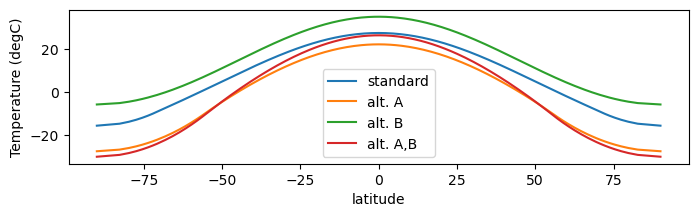

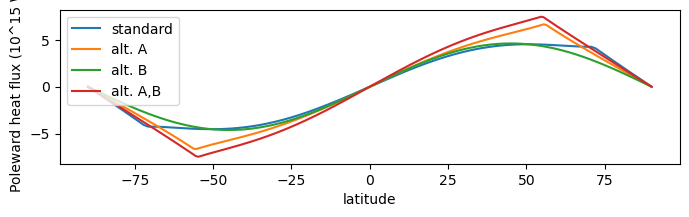

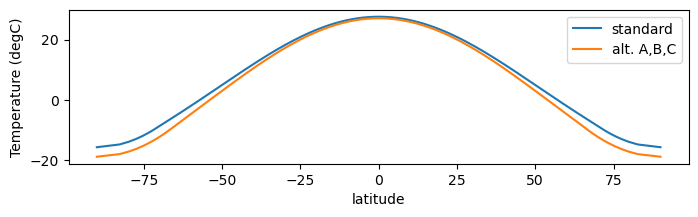

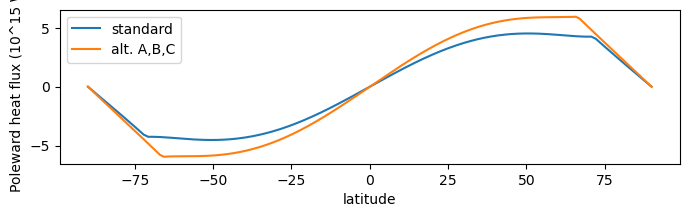

In [93]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='standard')
plt.plot(phi,TaltA,label='alt. A')
plt.plot(phi,TaltB,label='alt. B')
plt.plot(phi,TaltAB,label='alt. A,B')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='standard')
plt.plot(phi,FaltA*1e-15,label='alt. A')
plt.plot(phi,FaltB*1e-15,label='alt. B')
plt.plot(phi,FaltAB*1e-15,label='alt. A,B')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='standard')
plt.plot(phi,TaltABC,label='alt. A,B,C')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='standard')
plt.plot(phi,FaltABC*1e-15,label='alt. A,B,C')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()


<div class="alert alert-success">

**TASK 1.5 - no albedo feedback**:

The purpose of this exercise is to illustrate the different climate sensitivities with and without the albedo feedback. Use the standard parameter set for this exercise, except for the albedo parameterization.
    
**1.5.1**: The modern ice line is at about 72°N (or $x=0.95$). Set "albedoflag" to $0$ to fix the ice line at this value. Fixing the albedo in this way turns off the feedback between the temperature and the albedo. Show that the model is now much less sensitive to changes in $𝑄$. That is, find the values of $𝑄$ required for complete glaciation/deglaciation as in task 1.4. Assume that $-10°𝐶$ still marks where it is cold enough for ice to form. 
    
</div>

<div class="alert alert-danger">

*Solution task 1.5.1*: 

There is not much difference at present day. If the luminosity is lowered with 5%, corresponding to a colder climate, there is a clear difference with significantly colder temperatures if the albedo feedback is included. If $L$ is lowered by 25%, there is a total glaciation without the albedo feedback, only 10% lower $L$ is required with the albedo feedback (see 1.3.2). 
    
This means that without the albedo feedback, the climate system is much less sensitive compared to the standard values.

</div>

In [94]:
#call the function with standard set of parameters, i.e. albedoflag=1
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, albedoflag)

#call the function with albedoflag=0
Talb0, Tglobalb0, Falb0, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, 0)

print(Tglob,np.max(T)-np.min(T),np.max(T))
print(Tglobalb0,np.max(Talb0)-np.min(Talb0),np.max(Talb0))

14.385632946126913 43.18554364769114 27.576138713859486
14.385632946126465 43.1855436476911 27.576138713859002


In [95]:
#call the function with L=0.7, otherwise standard parameters, i.e. albedoflag=1
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, 0.7, coldstart, hadleyflag, albedoflag)

#call the function with L=0.7 and albedoflag=0
Talb0, Tglobalb0, Falb0, divF, alb, S = north_model(A, B, Dmag, 0.7, coldstart, hadleyflag, 0)

print(Tglob,np.max(T)-np.min(T),np.max(T))
print(Tglobalb0,np.max(Talb0)-np.min(Talb0),np.max(Talb0))

-52.01087839210771 14.487513742071506 -47.143073774771864
-19.111875119131124 30.22988055338359 -9.8785210817184


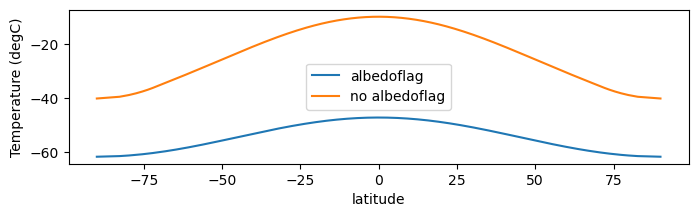

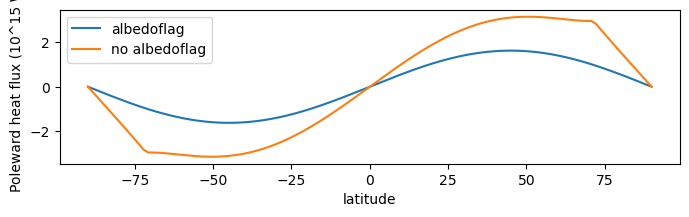

In [96]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='albedoflag')
plt.plot(phi,Talb0,label='no albedoflag')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='albedoflag')
plt.plot(phi,Falb0*1e-15,label='no albedoflag')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()



<div class="alert alert-success">

**TASK 1.6 - spatial variations in D**: 

It has been suggested that since the Hadley Cell is more efficient in redistributing heat than
extratropical weather systems, $D$ should vary with latitude, i.e. $D=D(x)$. It was suggested that a
larger value of $D$ should be used within the tropics. This can be represented in a simple way by
increasing $D$ by a factor of 10 within approximately 30° of Equator. It is implemented in the model
by this expression:
   
$$ D(x)= D_0 \left[ 1 + 9\ exp\left(\frac{-x}{sin(30º)}\right)^6\ \right]$$

---
    
**1.6.1**: Make a plot to compare the diffusion $D=D(x)$ as a function of $x$ for the default parameters (constant $D$) and the version with a Hadley cell. 

[Hint: call the D_lat function two times, one with "hadleyflag" "on" (=1) and one with "hadleyflag" "off" (=0)]
    
**1.6.2**: Describe the resulting climate. Examine and try to explain the effect from including a Hadley cell on the decrease of $Q$ required for a global
glaciation to occur.
    
</div>

<div class="alert alert-danger">

*Solution task 1.6.1 and 1.6.2*: 

The Hadley cell option use a latitude dependent D – see figure below, with higher values in a low latitude band, corresponding to the Hadley cell circulation. 
    
With the Hadley cell, the model removes heat more effectively from the equator, leading to a lower maximum temperature of 21.8°C compared to 27.6°C for the uniform $D$. Temperatures are approximately constant between ±40° latitude, and there are warmer temperatures at higher latitudes. 
    
For a total glaciation, a larger change in $L$ is required, to reach the freezing point at the equator, compared to standard values. This is because the heat is distributed more evenly over the globe. E.g. try run the model with $L=0.9$ which was the value required for total glaciation, found in task 1.3 above. For $L=0.85$ there is glaciation with a Hadley cell included.

</div>

In [97]:
#call the function with standard set of parameters, i.e. hadleyflag=0
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, hadleyflag, albedoflag)
D=D_lat(x,Dmag,0)

#call the function with albedoflag=1
Thad1, Tglobhad1, Fhad1, divF, alb, S = north_model(A, B, Dmag, L, coldstart, 1, albedoflag)
Dhad1=D_lat(x,Dmag,1)

print(Tglob,np.max(T)-np.min(T),np.max(T))
print(Tglobhad1,np.max(Thad1)-np.min(Thad1),np.max(Thad1))

14.385632946126913 43.18554364769114 27.576138713859486
15.881894928005568 28.835709810066913 22.4739873833352


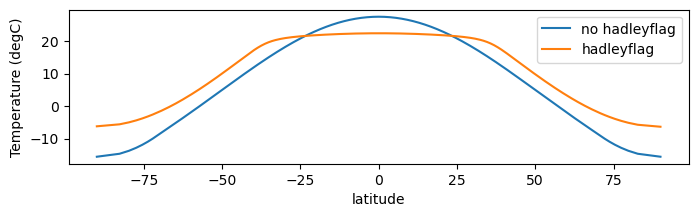

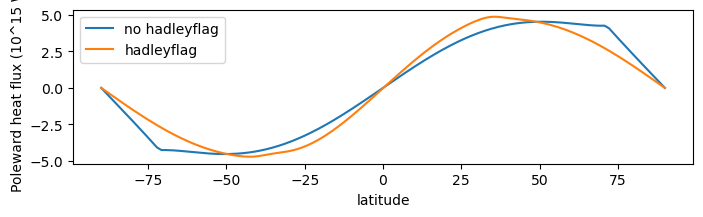

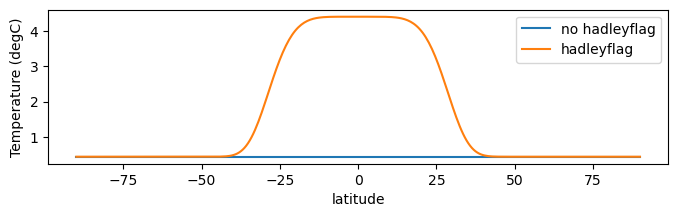

In [98]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='no hadleyflag')
plt.plot(phi,Thad1,label='hadleyflag')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='no hadleyflag')
plt.plot(phi,Fhad1*1e-15,label='hadleyflag')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,D,label='no hadleyflag')
plt.plot(phi,Dhad1,label='hadleyflag')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()



<div class="alert alert-success">

**TASK 1.7 - sensitivity to initial conditions**:

The model calculates the temperature using a time-stepping iterative method. All above calculations have been
started with warm initial conditions for the model. The initial temperature is set to 0°𝐶 in the
standard run. The model has multiple equilibrium solutions for some range of $𝑄$.
    
**1.7.1**: To show this, begin with the standard set of parameters. Make a plot of how the mean temperature $T_{glob}$ varies for different values of $L$ over the range 0.75 (corresponding to $S/4=254 W/m^2$) to 1.25 (corresponding to $S/4=423 W/m^2$). 

**1.7.2**: Now instead start off with a cold initial temperature profile by using a cold start (set the initial temperature offset to $-40°𝐶$). Make the same plot again. This will show the hysteresis loop in the climate and is a measure of how hard it is to get out of a completely glaciated configuration. 
    
---

This can be used to illustrate the faint young sun paradox. Because the Earth was weaker in the past, the Earth could have had cold “initial
conditions”. Yet snowball Earth conditions are thought to have been rare and discontinuous.
</div>


<div class="alert alert-success">

**TASK 1.8 - increase in greenhouse gases**:

A cheap and simple way of introducing $CO_2$ forcing into the model is to adjust the model parameter $A$ by $\Delta A$, where
    
$$\Delta A = \ -k \ ln\left(\frac{CO_2}{360ppmv}\right)$$
    
with $k=5.35\ W\ m^{-2}$, and $CO_2$ is the concentration of $CO_2$ in ppmv. Thus an increase in atmospheric
$CO_2$ causes a decrease in the longwave emissions to space. During ice ages, records from ice cores
show that $CO_2$ varied between 200 ppmv and 280 ppmv. A doubling of $CO_2$ from todays value would
take it up to around 720 ppmv. 
    
**1.8.1**: Explore what changes these values would make to climate. Note any
effect that the ice albedo feedback or $D$ has. You may find it instructive to estimate the climate sensitivity parameter  $-1/ \lambda$ from  $-1/ \lambda\sim -\Delta T_{mean} / \Delta A $, using that $\Delta Q=-\Delta A$.
 
</div>

<div class="alert alert-danger">

*Solution task 1.8*: 

We investigate the doubling of $CO_2$ scenario. We assume that there is a Hadley cell, and set the hadley flag on. We find a temperature increase of appr. $1.8°C$ and a radiative forcing of $\Delta Q=-\Delta A= 3.7W/m^2$. This gives a climate sensitivity parameter of $-1/\lambda=0.5 K/W/m^2$.

</div>

In [99]:
#call the function with standard set of parameters
T, Tglob, F, divF, alb, S = north_model(A, B, Dmag, L, coldstart, 1, albedoflag)

#call the function with A corresponding to a doubling of CO2: A=203.3-5.35*math.log(720/360)
altA=203.3-5.35*math.log(720/360)
TaltA, TglobaltA, FaltA, divF, alb, S = north_model(altA, B, Dmag, L, coldstart, 1, albedoflag)

print(Tglob,np.max(T)-np.min(T),np.max(T))
print(TglobaltA,np.max(TaltA)-np.min(TaltA),np.max(TaltA))

dTvm=TglobaltA-Tglob
dQ=-(altA-A)
sens=dTvm/dQ
print(dTvm)
print(dQ)
print(sens)

15.881894928005568 28.835709810066913 22.4739873833352
17.65621905049268 28.835709810067573 24.24831150582245
1.774324122487112
3.7083374159957145
0.47846889952183425


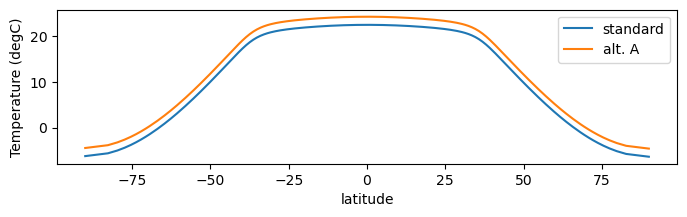

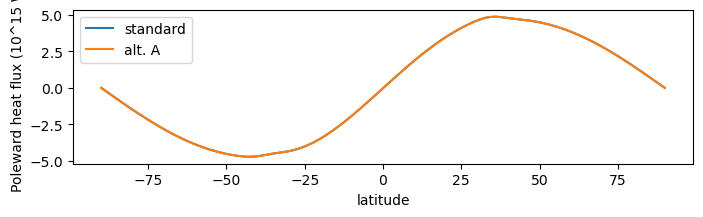

In [100]:
fig = plt.subplots(figsize=(8,2))
plt.plot(phi,T,label='standard')
plt.plot(phi,TaltA,label='alt. A')
plt.xlabel('latitude')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

fig = plt.subplots(figsize=(8,2))
plt.plot(phi,F*1e-15,label='standard')
plt.plot(phi,FaltA*1e-15,label='alt. A')
plt.xlabel('latitude')
plt.ylabel('Poleward heat flux (10^15 W)')
plt.legend()
plt.show()

